## Quantum Illumination Experiment 3

__Error probabilities with respect to average photon numbers.__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

--- 3799.040326356888 seconds ---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuration
from IPython.display import set_matplotlib_formats
plt.style.use(['seaborn-whitegrid', '14pt'])
set_matplotlib_formats('pdf', 'png')
np.set_printoptions(threshold='nan', precision=6, suppress=True)
%matplotlib inline

In [7]:
df1 = pd.read_csv('../output/data/expr_3_nbar_nth_1.0_g_51_03-20.csv', comment='#')

In [8]:
df1.head()

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,1.0,0.01,TMSS,0.001,0.000002,0.000015,0.499966,0.500000,0.5,9.999990e-07,9.999990e-07,NaN,NaN
1,1.0,0.01,TMSS,0.019,0.000722,0.003224,0.499360,0.499999,0.5,3.611304e-04,3.611304e-04,NaN,NaN
2,1.0,0.01,TMSS,0.037,0.002742,0.010409,0.498754,0.499997,0.5,1.370877e-03,1.370877e-03,NaN,NaN
3,1.0,0.01,TMSS,0.055,0.006068,0.020630,0.498150,0.499993,0.5,3.034178e-03,3.034178e-03,NaN,NaN
4,1.0,0.01,TMSS,0.073,0.010715,0.033388,0.497547,0.499988,0.5,5.357550e-03,5.357550e-03,NaN,NaN


## Plot

In [9]:
dashes = {'PA':[6,3], 'PS':[3,1], 'PAS':[2,2,1,2], 'PSA':[6,4,2,4], 'PCS':[5,3,1,3]}
names = ('TMSS', 'PS', 'PA', 'PAS', 'PSA', 'PCS')

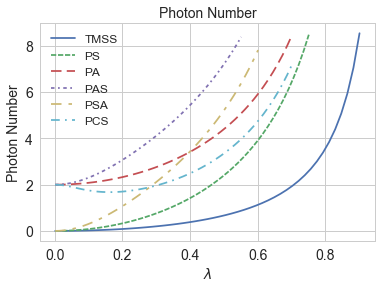

In [10]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Aver_N'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Aver_N'], 
                 dashes=dashes[name], label=name)
# plt.xlim(0, 0.8)
# plt.ylim(0, 7)
plt.legend(loc=2, fontsize=12)
plt.xlabel("$\lambda$")
plt.ylabel("Photon Number")
plt.title("Photon Number")
plt.show()

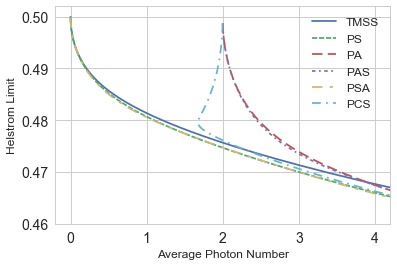

In [11]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.2, 4.2)
plt.ylim(0.460, 0.502)
plt.legend(loc=3, fontsize=12)
plt.xlabel("Average Photon Number", fontsize=12)
plt.ylabel("Helstrom Limit", fontsize=12)
# plt.title("Helstrom Bound under Small Squeezing Parameters", fontsize=12)
plt.legend(loc=0, fontsize=12)
plt.savefig('../output/figures/g_qhb_vs_nbar_nth_1_full.pdf', bbox_inches='tight')
plt.show()

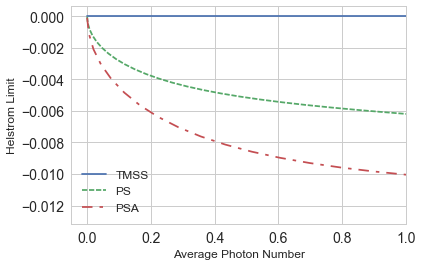

In [12]:
base = df1[df1['State'] == 'TMSS']['Helstrom_Bound']
for name in ('TMSS', 'PS', 'PSA'):
    temp_df = df1[df1['State'] == name]
#     print(name)
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'] - base, label=name)
    else:
#         print(temp_df['Helstrom_Bound'])
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'].values - base, 
                 dashes=dashes[name], label=name)
plt.xlim(-0.05, 1.0)
# plt.ylim(0.478, 0.502)
plt.legend(loc=3, fontsize=12)
plt.xlabel("Average Photon Number", fontsize=12)
plt.ylabel("Helstrom Limit", fontsize=12)
# plt.title("Helstrom Bound under Small Squeezing Parameters", fontsize=12)
plt.legend(loc=0, fontsize=12)
plt.savefig('../output/figures/g_qhb_vs_nbar_nth_1_small.pdf', bbox_inches='tight')
plt.show()

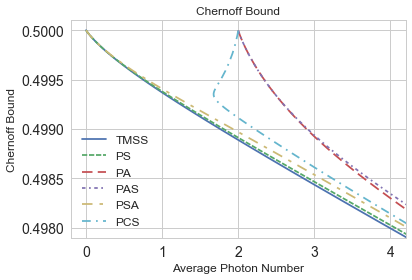

In [13]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.2, 4.2)
plt.ylim(0.4979, 0.5001)
plt.legend(loc=3, fontsize=12)
plt.xlabel("Average Photon Number", fontsize=12)
plt.ylabel("Chernoff Bound", fontsize=12)
plt.title("Chernoff Bound", fontsize=12)

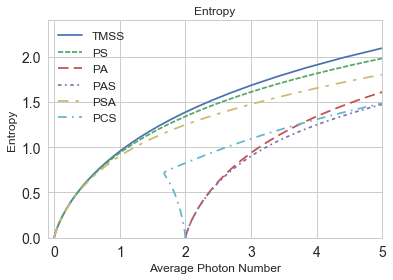

In [14]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['VN_Entropy'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['VN_Entropy'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.1, 5)
plt.ylim(0.0, 2.4)
plt.legend(fontsize=12)
plt.xlabel("Average Photon Number", fontsize=12)
plt.ylabel("Entropy", fontsize=12)
plt.title("Entropy", fontsize=12)
plt.savefig('../output/figures/g_entropy_vs_nbar_nth_1.pdf', bbox_inches='tight')

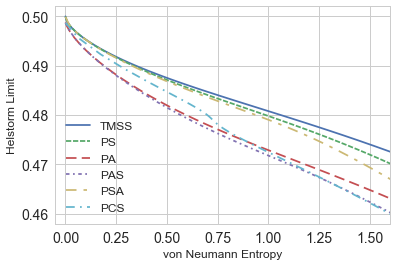

In [15]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['VN_Entropy'], temp_df['Helstrom_Bound'], label=name)
    else:
        plt.plot(temp_df['VN_Entropy'], temp_df['Helstrom_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.05, 1.6)
plt.ylim(0.458, 0.502)
plt.legend(loc=3, fontsize=12)
plt.xlabel("von Neumann Entropy", fontsize=12)
plt.ylabel("Helstorm Limit", fontsize=12)
# plt.title("Helstrom Limits vs. von Neumann Entropy", fontsize=12)
plt.savefig('../output/figures/g_qhb_vs_entropy_nth_1.pdf', bbox_inches='tight')

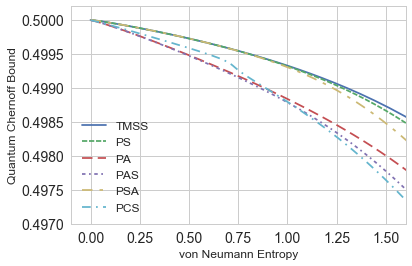

In [16]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['VN_Entropy'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['VN_Entropy'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.1, 1.6)
plt.ylim(0.497, 0.5002)
plt.legend(fontsize=12)
plt.xlabel("von Neumann Entropy", fontsize=12)
plt.ylabel("Quantum Chernoff Bound", fontsize=12)
# plt.title("Helstrom Limits vs. von Neumann Entropy", fontsize=12)
plt.savefig('../output/figures/g_qcb_vs_entropy_nth_1.pdf', bbox_inches='tight')